# 构建基于特征的语法

本章的目的是要回答下列问题：

我们怎样用特征扩展上下文无关语法框架，以获得更细粒度的对语法类别和产生式的控制？

特征结构的主要形式化属性是什么，我们如何使用它们来计算？

我们现在用基于特征的语法能捕捉到什么语言模式和语法结构？

一路上，我们将介绍更多的英语句法主题，包括约定、子类别和无限制依赖成分等现象。

## 语法特征
在本章中，我们将探讨特征在建立基于规则的语法中的作用。对比特征提取，记录已经自动检测到的特征，我们现在要声明词和短语的特征。我们以一个很简单的例子开始，使用字典存储特征和它们的值。

In [1]:
kim = {'CAT': 'NP', 'ORTH': 'Kim', 'REF': 'k'}
chase = {'CAT': 'V', 'ORTH': 'chased', 'REL': 'chase'}

对象kim和chase有几个共同的特征，CAT（语法类别）和ORTH（拼写）。此外，每一个还有更面向语义的特征：kim['REF']意在给出kim的指示物，而chase['REL']给出chase表示的关系。在基于规则的语法上下文中，这样的特征和特征值对被称为特征结构，我们将很快看到它们的替代符号。

我们可能要进一步增加属性。例如，对于一个动词，根据动词的参数知道它扮演的“语义角色”往往很有用。对于chase，主语扮演“施事”的角色，而宾语扮演“受事”角色。让我们添加这些信息，使用'sbj'和'obj'作为占位符，它会被填充，当动词和它的语法参数结合时：

In [2]:
chase['AGT'] = 'sbj'
chase['PAT'] = 'obj'

In [3]:
sent = "Kim chased Lee"
tokens = sent.split()
lee = {'CAT': 'NP', 'ORTH': 'Lee', 'REF': 'l'}
def lex2fs(word):
    for fs in [kim, lee, chase]:
        if fs['ORTH'] == word:
            return fs
subj, verb, obj = lex2fs(tokens[0]), lex2fs(tokens[1]), lex2fs(tokens[2])
verb['AGT'] = subj['REF']# agent of 'chase' is Kim
verb['PAT'] = obj['REF']# patient of 'chase' is Lee
for k in ['ORTH', 'REL', 'AGT', 'PAT']:
    print("%-5s => %s" % (k, verb[k]))# check featstruct of 'chase'

ORTH  => chased
REL   => chase
AGT   => k
PAT   => l


## 句子协议
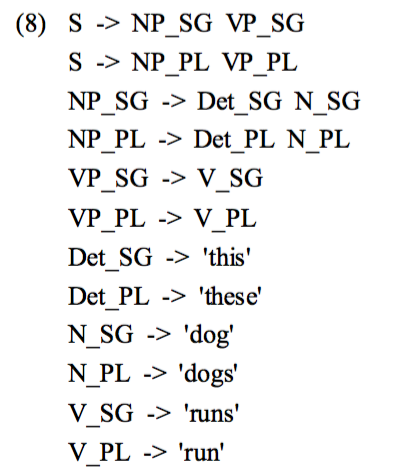

## 使用属性和约束
NP[NUM=?n] VP[NUM=?n]

In [4]:
import nltk
nltk.download('book_grammars')

[nltk_data] Downloading package book_grammars to C:\nltk_data...
[nltk_data]   Package book_grammars is already up-to-date!


True

In [5]:
nltk.data.show_cfg('grammars/book_grammars/feat0.fcfg')

% start S
# ###################
# Grammar Productions
# ###################
# S expansion productions
S -> NP[NUM=?n] VP[NUM=?n]
# NP expansion productions
NP[NUM=?n] -> N[NUM=?n] 
NP[NUM=?n] -> PropN[NUM=?n] 
NP[NUM=?n] -> Det[NUM=?n] N[NUM=?n]
NP[NUM=pl] -> N[NUM=pl] 
# VP expansion productions
VP[TENSE=?t, NUM=?n] -> IV[TENSE=?t, NUM=?n]
VP[TENSE=?t, NUM=?n] -> TV[TENSE=?t, NUM=?n] NP
# ###################
# Lexical Productions
# ###################
Det[NUM=sg] -> 'this' | 'every'
Det[NUM=pl] -> 'these' | 'all'
Det -> 'the' | 'some' | 'several'
PropN[NUM=sg]-> 'Kim' | 'Jody'
N[NUM=sg] -> 'dog' | 'girl' | 'car' | 'child'
N[NUM=pl] -> 'dogs' | 'girls' | 'cars' | 'children' 
IV[TENSE=pres,  NUM=sg] -> 'disappears' | 'walks'
TV[TENSE=pres, NUM=sg] -> 'sees' | 'likes'
IV[TENSE=pres,  NUM=pl] -> 'disappear' | 'walk'
TV[TENSE=pres, NUM=pl] -> 'see' | 'like'
IV[TENSE=past] -> 'disappeared' | 'walked'
TV[TENSE=past] -> 'saw' | 'liked'


In [6]:
'''
NLTK 中使用 Earley 图表分析器分析基于特征的文法
用分析器的 nbest_parse()方法将返回一个 分析树的 trees 链表
跟踪基于特征的图表分析器
'''
tokens = 'Kim likes children'.split()
from nltk import load_parser
cp = load_parser('grammars/book_grammars/feat0.fcfg', trace=2)
for tree in cp.parse(tokens):
    print(tree)

|.Kim .like.chil.|
Leaf Init Rule:
|[----]    .    .| [0:1] 'Kim'
|.    [----]    .| [1:2] 'likes'
|.    .    [----]| [2:3] 'children'
Feature Bottom Up Predict Combine Rule:
|[----]    .    .| [0:1] PropN[NUM='sg'] -> 'Kim' *
Feature Bottom Up Predict Combine Rule:
|[----]    .    .| [0:1] NP[NUM='sg'] -> PropN[NUM='sg'] *
Feature Bottom Up Predict Combine Rule:
|[---->    .    .| [0:1] S[] -> NP[NUM=?n] * VP[NUM=?n] {?n: u'sg'}
Feature Bottom Up Predict Combine Rule:
|.    [----]    .| [1:2] TV[NUM='sg', TENSE='pres'] -> 'likes' *
Feature Bottom Up Predict Combine Rule:
|.    [---->    .| [1:2] VP[NUM=?n, TENSE=?t] -> TV[NUM=?n, TENSE=?t] * NP[] {?n: u'sg', ?t: u'pres'}
Feature Bottom Up Predict Combine Rule:
|.    .    [----]| [2:3] N[NUM='pl'] -> 'children' *
Feature Bottom Up Predict Combine Rule:
|.    .    [----]| [2:3] NP[NUM='pl'] -> N[NUM='pl'] *
Feature Bottom Up Predict Combine Rule:
|.    .    [---->| [2:3] S[] -> NP[NUM=?n] * VP[NUM=?n] {?n: u'pl'}
Feature Single Edge Fun

## 术语
原子值的一种特殊情况是布尔值，也就是说，值仅仅指定一个属性是真还是假。例如：我们可能要用布尔特征 AUX 区分助动词，如：can、may、will 和 do。

那么产生式 V[TENSE=pres,aux=+] -> 'can'意味着 can 接受 TENSE的值为 pres 并且 AUX 的值为+或 true。

有一个广泛采用的约定用缩写表示布尔特征 f；不用 aux=+或 aux=-，我们分别用+aux 和-aux。这些都是缩写，然而，分析器就像+和-是其他原子值一样解释它们。（17）显示了一些有代表性的产生式：

(17) V[TENSE=pres, +aux] -> 'can'

V[TENSE=pres, +aux] -> 'may'

V[TENSE=pres, -aux] -> 'walks'

V[TENSE=pres, -aux] -> 'likes'

属性值矩阵：
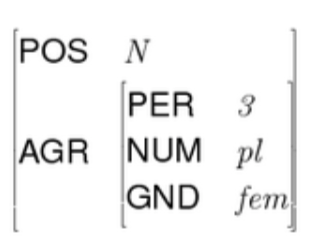

## 处理特征结构

在本节中，我们将展示如何在NLTK中构建和操作特征结构。

NLTK中的特征结构使用构造函数FeatStruct()声明。原子特征值可以是字符串或整数。

In [7]:
fs1 = nltk.FeatStruct(TENSE='past', NUM='sg')
print fs1

[ NUM   = 'sg'   ]
[ TENSE = 'past' ]


In [8]:
fs1 = nltk.FeatStruct(PER=3, NUM='pl', GND='fem')
print(fs1['GND'])

fem


In [9]:
#一个特征结构实际上只是一种字典
fs1['CASE'] = 'acc'
print fs1

[ CASE = 'acc' ]
[ GND  = 'fem' ]
[ NUM  = 'pl'  ]
[ PER  = 3     ]


In [10]:
#我们还可以为特征结构定义更复杂的值
fs2 = nltk.FeatStruct(POS='N', AGR=fs1)
print fs2

[       [ CASE = 'acc' ] ]
[ AGR = [ GND  = 'fem' ] ]
[       [ NUM  = 'pl'  ] ]
[       [ PER  = 3     ] ]
[                        ]
[ POS = 'N'              ]


In [11]:
print(fs2['AGR'])

[ CASE = 'acc' ]
[ GND  = 'fem' ]
[ NUM  = 'pl'  ]
[ PER  = 3     ]


In [12]:
print(fs2['AGR']['PER'])

3


## 包含和统一
合并两个特征结构的信息被称为统一，由方法 unify()支持

In [13]:
fs1 = nltk.FeatStruct(NUMBER=74, STREET='rue Pascal')
fs2 = nltk.FeatStruct(CITY='Paris')

In [14]:
print(fs2.unify(fs1))

[ CITY   = 'Paris'      ]
[ NUMBER = 74           ]
[ STREET = 'rue Pascal' ]


如果这两个特征结构共享路径π，但在 FS0 中的π值
与在 FS1 中的π值是不同的原子值。这通过设置统一的结果为 None 来实现。

现在，如果我们看一下统一如何与结构共享相互作用，事情就变得很有趣。

In [15]:
fs0 = nltk.FeatStruct("""[NAME=Lee,
                           ADDRESS=[NUMBER=74,
                                    STREET='rue Pascal'],
                           SPOUSE= [NAME=Kim,
                                    ADDRESS=[NUMBER=74,
                                             STREET='rue Pascal']]]""")
print(fs0)

[ ADDRESS = [ NUMBER = 74           ]               ]
[           [ STREET = 'rue Pascal' ]               ]
[                                                   ]
[ NAME    = 'Lee'                                   ]
[                                                   ]
[           [ ADDRESS = [ NUMBER = 74           ] ] ]
[ SPOUSE  = [           [ STREET = 'rue Pascal' ] ] ]
[           [                                     ] ]
[           [ NAME    = 'Kim'                     ] ]


In [16]:
fs1 = nltk.FeatStruct("[SPOUSE = [ADDRESS = [CITY = Paris]]]")
print(fs1.unify(fs0))

[ ADDRESS = [ NUMBER = 74           ]               ]
[           [ STREET = 'rue Pascal' ]               ]
[                                                   ]
[ NAME    = 'Lee'                                   ]
[                                                   ]
[           [           [ CITY   = 'Paris'      ] ] ]
[           [ ADDRESS = [ NUMBER = 74           ] ] ]
[ SPOUSE  = [           [ STREET = 'rue Pascal' ] ] ]
[           [                                     ] ]
[           [ NAME    = 'Kim'                     ] ]


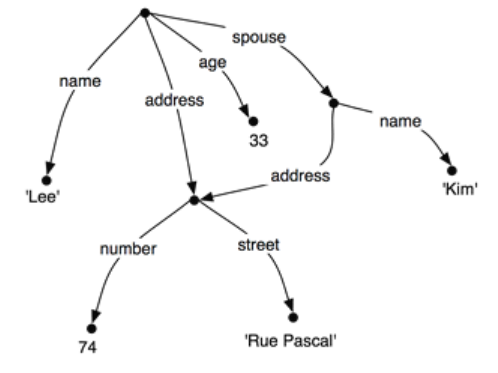

In [17]:
'''
当两条路径具有相同的值时，它们被称为是
等价的。
为了在我们的矩阵式表示中表示重入，我们将在共享的特征结构第一次出现的地方加一
个括号括起的数字前缀，例如（1）。以后任何对这个结构的引用将使用符号->(1)
'''
fs2 = nltk.FeatStruct("""[NAME=Lee, ADDRESS=(1)[NUMBER=74, STREET='rue Pascal'],
                           SPOUSE=[NAME=Kim, ADDRESS->(1)]]""")
print(fs1.unify(fs2))

[               [ CITY   = 'Paris'      ] ]
[ ADDRESS = (1) [ NUMBER = 74           ] ]
[               [ STREET = 'rue Pascal' ] ]
[                                         ]
[ NAME    = 'Lee'                         ]
[                                         ]
[ SPOUSE  = [ ADDRESS -> (1)  ]           ]
[           [ NAME    = 'Kim' ]           ]


In [18]:
'''
如果这两个特征结构共享路径π，但在 FS0 中的π值
与在 FS1 中的π值是不同的原子值。
FS0 和 FS1 之间的统一将失败.
'''
fs0 = nltk.FeatStruct(A='a')
fs1 = nltk.FeatStruct(A='b')
fs2 = fs0.unify(fs1)
print fs2

None


In [19]:
# 结构共享也可以使用变量表示，如?x。
fs1 = nltk.FeatStruct("[ADDRESS1=[NUMBER=74, STREET='rue Pascal']]")
fs2 = nltk.FeatStruct("[ADDRESS1=?x, ADDRESS2=?x]")
print(fs2)

[ ADDRESS1 = ?x ]
[ ADDRESS2 = ?x ]


In [20]:
print(fs2.unify(fs1))

[ ADDRESS1 = (1) [ NUMBER = 74           ] ]
[                [ STREET = 'rue Pascal' ] ]
[                                          ]
[ ADDRESS2 -> (1)                          ]


## 扩展基于特征的文法
我们回到基于特征的文法，探索各种语言问题，并展示将特征纳入文法的好
处。
### 子类别
1、一个简单的方法，最初为文法框架开发的称为广义短语结构文法（Generalized Phrase
Structure Grammar，GPSG），通过允许词汇类别支持子类别特征尝试解决这个问题，它告诉
我们该项目所属的子类别。相比 GPSG 使用的整数值表示 SUBCAT，下面的例子采用更容
易记忆的值，即 intrans、trans 和 clause：


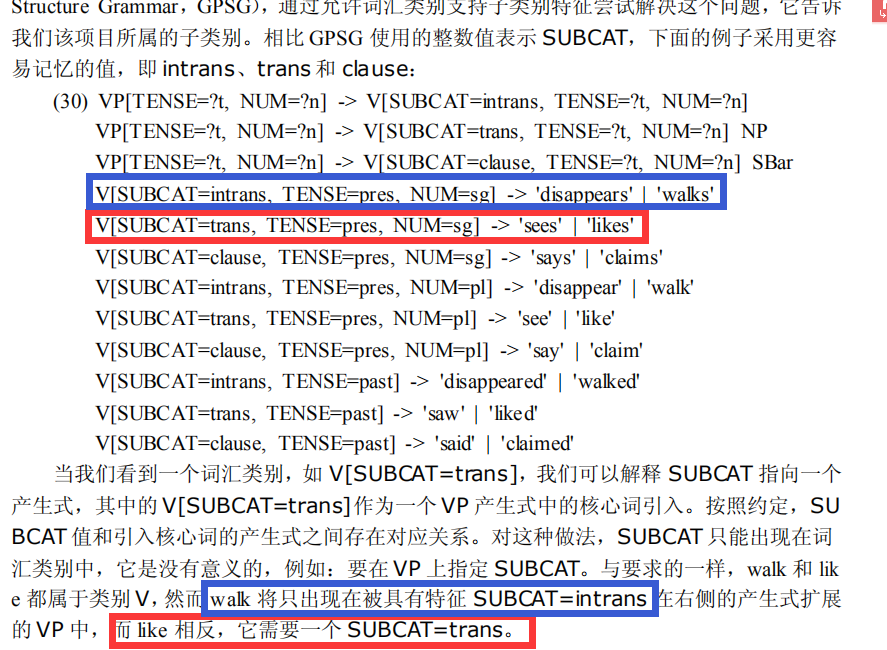

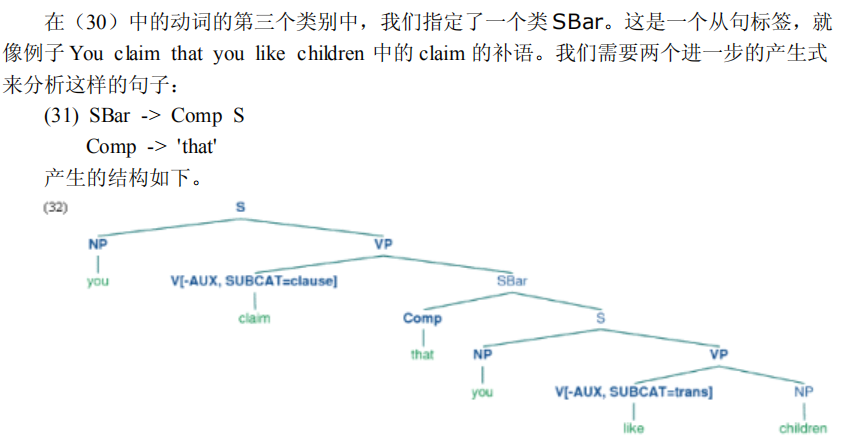

2、 PATR 和核心驱动短语结构文法

SUBCAT 值直接为中心词的配价

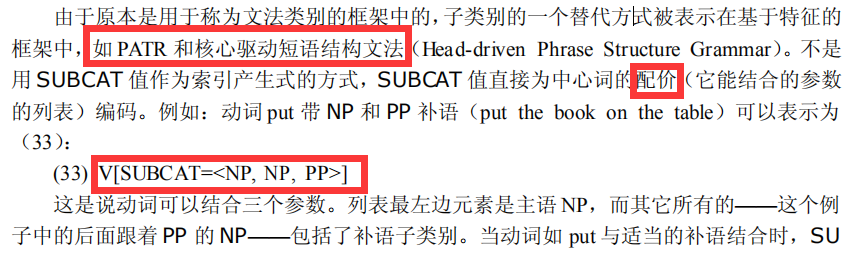

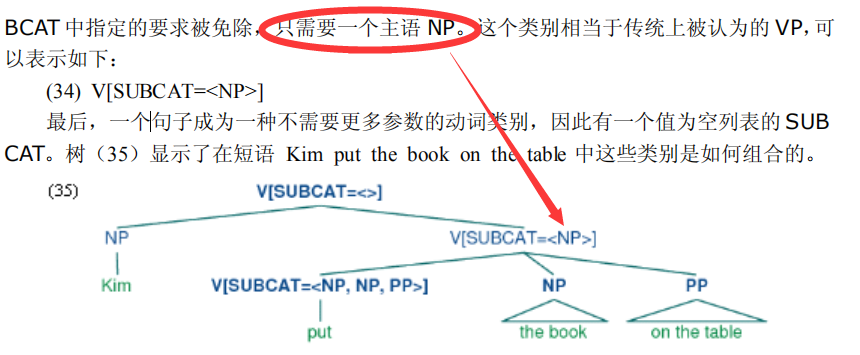

### 核心词
通过从主类别标签分解出子类别信息，我们可以表达有关动
词属性的更多概括。类似的另一个属性如下：V 类的表达式是 VP 类的短语的核心。同样，
N 是 NP 的核心词，A（即形容词）是 AP 的核心词，P（即介词）是 PP 的核心词。

X-bar 句法通过抽象出短语级别的概念，解决了这个问题。它通常认为有三个这样的级
别。如果 N 表示的词汇级别，那么 N'表示更高一层级别，对应较传统的级别 Nom，N''表
示短语级别，对应类别 NP。（36a）演示了这种表示结构，而（36b）是更传统的对应
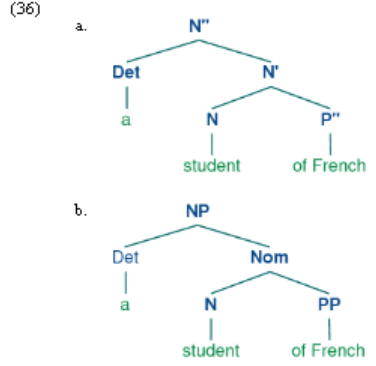

N''是最大的投影，
N 有时也被称为零投影。
P''也是如此
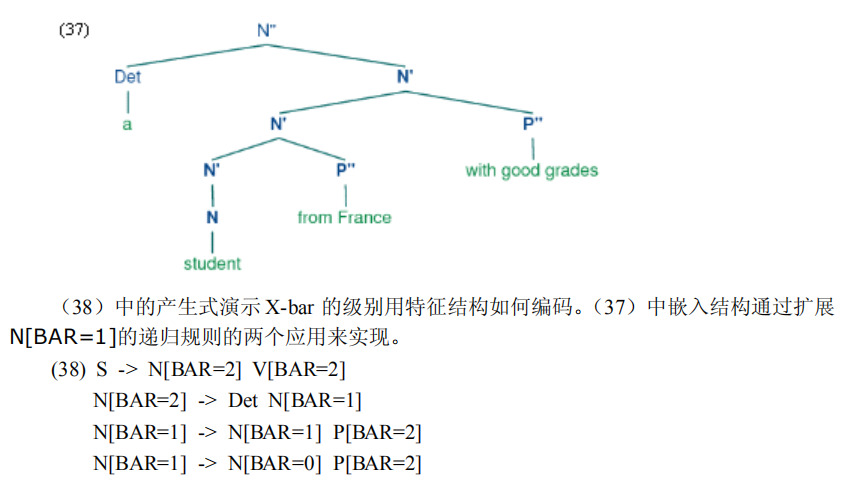

### 助动词与倒装

S[+INV] -> V[+AUX] NP VP

标记有[+inv]的从句包含一个助动词，其后跟着一个 VP。
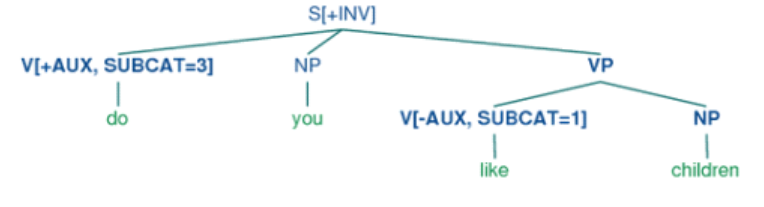

### 无限制依赖成分

填充词和缺口之间的距离没有上界。

已经提出了各种各样的机制处理形式化文法中的无限依赖；在这里我们说明 广义短语结
构文法 中使用的方法，其中包含斜线类别。一个斜线类别的形式是 Y/XP；我们解释为：类
别 Y 的短语缺少一个类别 XP 的子成分。例如：S/NP 是缺少一个 NP 的 S。斜线类别的使
用说明如（53）所示
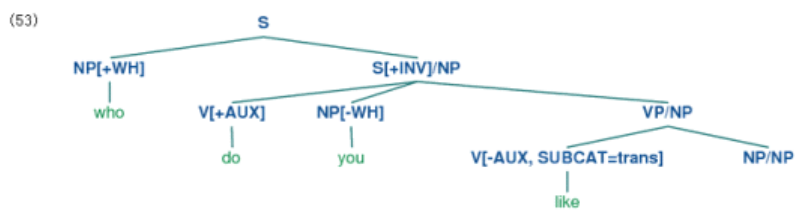
树的顶端部分引入了填充词 who（作为 NP[+wh]类表达式对待）和相应的包含成分 S
/NP 的缺口一起。缺口信息于是被向着树的下方通过 VP/NP 类别“预填充”，直到到达类
别 VP/NP。这时，由于意识到缺口信息为空字符串直接受控于 NP/NP，依赖被排除

In [21]:
nltk.data.show_cfg('grammars/book_grammars/feat1.fcfg')

% start S
# ###################
# Grammar Productions
# ###################
S[-INV] -> NP VP
S[-INV]/?x -> NP VP/?x
S[-INV] -> NP S/NP
S[-INV] -> Adv[+NEG] S[+INV]
S[+INV] -> V[+AUX] NP VP
S[+INV]/?x -> V[+AUX] NP VP/?x
SBar -> Comp S[-INV]
SBar/?x -> Comp S[-INV]/?x
VP -> V[SUBCAT=intrans, -AUX]
VP -> V[SUBCAT=trans, -AUX] NP
VP/?x -> V[SUBCAT=trans, -AUX] NP/?x
VP -> V[SUBCAT=clause, -AUX] SBar
VP/?x -> V[SUBCAT=clause, -AUX] SBar/?x
VP -> V[+AUX] VP
VP/?x -> V[+AUX] VP/?x
# ###################
# Lexical Productions
# ###################
V[SUBCAT=intrans, -AUX] -> 'walk' | 'sing'
V[SUBCAT=trans, -AUX] -> 'see' | 'like'
V[SUBCAT=clause, -AUX] -> 'say' | 'claim'
V[+AUX] -> 'do' | 'can'
NP[-WH] -> 'you' | 'cats'
NP[+WH] -> 'who'
Adv[+NEG] -> 'rarely' | 'never'
NP/NP ->
Comp -> 'that'


In [22]:
#我们可以分析序列：who do you claim that you like
tokens = 'who do you claim that you like'.split()
from nltk import load_parser
cp = load_parser('grammars/book_grammars/feat1.fcfg')
for tree in cp.parse(tokens):
    print(tree)

(S[-INV]
  (NP[+WH] who)
  (S[+INV]/NP[]
    (V[+AUX] do)
    (NP[-WH] you)
    (VP[]/NP[]
      (V[-AUX, SUBCAT='clause'] claim)
      (SBar[]/NP[]
        (Comp[] that)
        (S[-INV]/NP[]
          (NP[-WH] you)
          (VP[]/NP[] (V[-AUX, SUBCAT='trans'] like) (NP[]/NP[] )))))))


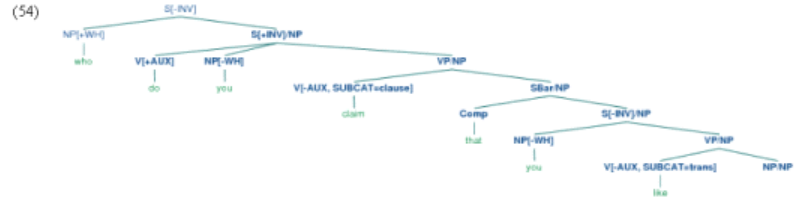

In [23]:
tokens = 'you claim that you like cats'.split()
for tree in cp.parse(tokens):
    print(tree)

(S[-INV]
  (NP[-WH] you)
  (VP[]
    (V[-AUX, SUBCAT='clause'] claim)
    (SBar[]
      (Comp[] that)
      (S[-INV]
        (NP[-WH] you)
        (VP[] (V[-AUX, SUBCAT='trans'] like) (NP[-WH] cats))))))


In [24]:
tokens = 'rarely do you sing'.split()
for tree in cp.parse(tokens):
    print(tree)

(S[-INV]
  (Adv[+NEG] rarely)
  (S[+INV]
    (V[+AUX] do)
    (NP[-WH] you)
    (VP[] (V[-AUX, SUBCAT='intrans'] sing))))
